# Human TTN遺伝子上のmotif配列の統計および可視化

## 準備

In [9]:
# オリジナルモジュールのインポート
from lib.introngap import PileUp
from lib.gbkparse import Seq_count

# モジュールのインポート
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
# クラスのインスタンス化
gbk = Seq_count()

# gbkファイルの読み込み
gbk.read_gbk('../data/gbk/mouse_ttn.gb')

In [11]:
# 登録されているmRNAのIDを取得
for i in gbk.get_mrna_ids():
    gbk.set_mrna_id(i)
    print(i,gbk.intron_num())

XM_036160538.1 191
XM_036160537.1 276
XM_036160536.1 291
XM_036160535.1 292
XM_036160534.1 293
XM_036160529.1 297
XM_036160528.1 302
XM_036160527.1 305
XM_036160524.1 306
XM_036160520.1 337
XM_036160543.1 45
NM_028004.2 191
NM_011652.3 312
NM_001385708.1 348
XM_036160540.1 149


In [12]:

# トランスクリプトバリアントの設定
gbk.set_mrna_id('NM_001385708.1')

## n個の塩基の組み合わせ配列を作成、イントロン内のそれぞれの配列の個数を可視化

In [13]:
# n個の塩基の組み合わせ配列を作成
# intron_motif_stats関数で、すべてイントロン領域の配列の個数をカウント
# その後、カウントした個数を全体の個数で割ることで、頻度を算出
n = 4
df = gbk.intron_motif_stats(intron=1, n=n) 
for i in range(gbk.intron_num()-1):
    tmp_df = gbk.intron_motif_stats(intron=i+2, n=n)
    tmp_df.columns = [f'intron_{i+2}']
    df = pd.merge(df, tmp_df, left_index=True, right_index=True)
ndf = df/df.sum(axis=0)

In [14]:
# ヒートマップで各イントロンの組み合わせ配列の頻度を可視化
tndf = ndf.T
fig = px.imshow(tndf, text_auto=True)
fig.update_layout(width=800, height=800)
fig.show()

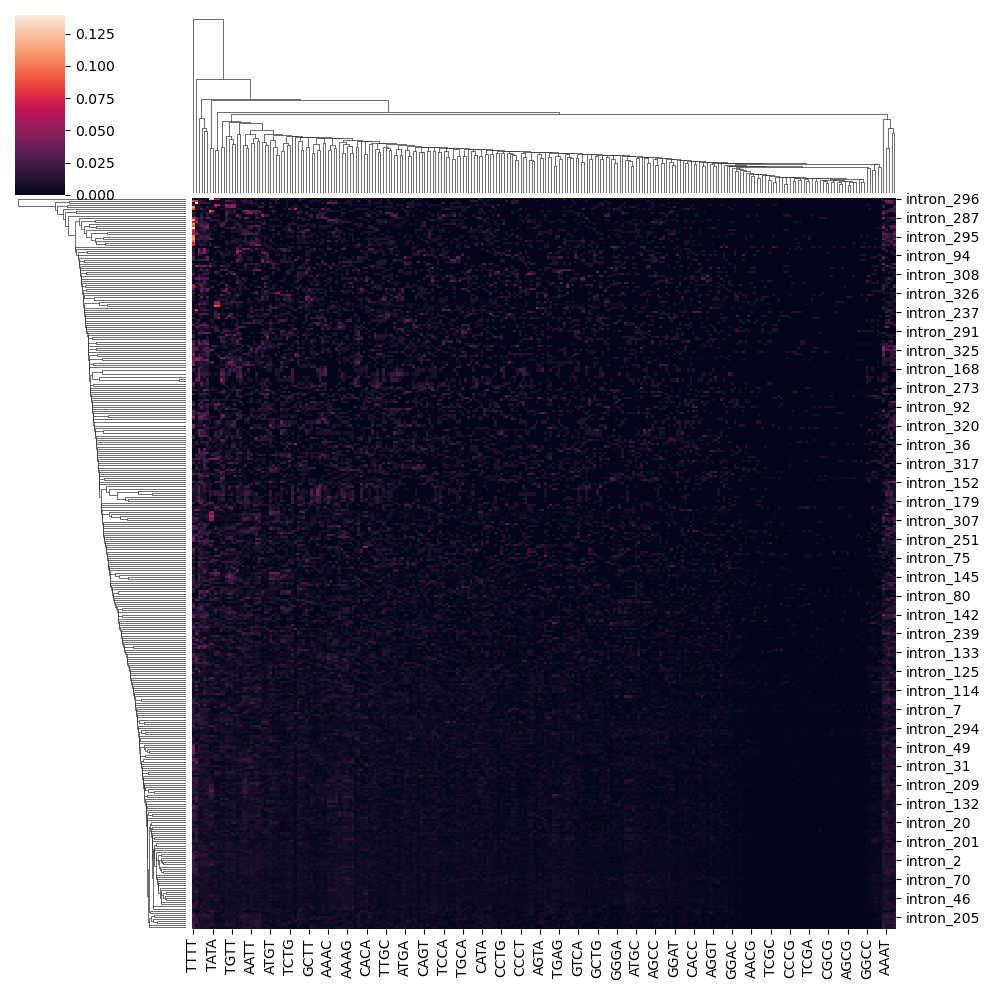

In [15]:
# クラスタリングを実施
g = sns.clustermap(tndf)
reordered_index = tndf.index[g.dendrogram_row.reordered_ind]
reordered_columns = tndf.columns[g.dendrogram_col.reordered_ind]
clustered_tndf = tndf.loc[reordered_index, reordered_columns]
clustered_tndf

# クラスタリング後のヒートマップを可視化
fig = px.imshow(clustered_tndf, text_auto=True)
fig.update_layout(width=800, height=800)
fig.show()

## 特定のイントロン領域の配列を表示

In [36]:
# イントロン175, 176, 177, 178, 179, 180, 181の配列を取得
ls =[175, 176, 177, 178, 179, 180, 181]
for i in ls:
    print(i, gbk.intron_seq(i))


175 GTACTTGTCAGCTGAACTAGCCTTCAGAGAGATCTTCTCCCATTCTTGAAAGTCAACGTACACCATTTTGTCTCCACTAACCTAAATGATAAAACTACTAATATCTTTTAAG
176 GTACATGTCAGCTGAACTAATCTTCAGAAGAAATCTCTCCCCTATTCTTGAAAGCAAATGTGTGTATTGCTGTTAATTAACTAAATATAAAACTACTAATATCTTTTAAG
177 GTACATGTCAGCTGAACTAACCCTTCAGAAGAAATCTCTCTCCTATTCTTGAAAGCAAATGTGTGTATTGTTGTTAATTAACTAAATATAAAACTACTAATATCTTTTAAG
178 GTACATGTCACACAGATCTTCAGAAGAAGAAATCTCTCTACTATGCCTGAATACAAACATAGACCATTGTTCTTTATTAACCTAAGTGTAAAACTACTAATATCTTTTAAG
179 GTACATGTCAGCTGAACTAATCTTCAGAAGAAATGTCTCTTCCGTTCTTGAAAATAAACACAGACCATTGTTCTTTATTAACTTAAGTGTAAAACTACTAATATCTTTAAG
180 GTACATGTCAGCTAAGTGAAACTTCAGAAGAAATATCTCTTCCATTCTTGAAAACAAACATAGACCATTGCTCGTTATTAACCAAAGTGTAAAACTACTAATATCTTTTAAG
181 GTACTTGTCACACAGACCTTCTTCAGAAGAAATCTCTCTTCTATGCCTAAAAGACAATGTAGACCATTGTTTCCACTAACCTAAGTAATAAAGTACTAATATCTTTTAAG


In [35]:
# イントロン167, 168, 169, 171, 185, 186, 188の配列を取得
ls = [167, 168, 169, 171, 185, 186, 188]
for i in ls:
    print(i, gbk.intron_seq(i))


167 GTATTCTTCAATGGCCTGAGGCTTCATAGGGCCTAAGTCTGGTCTTGAAAAGATTTCATTCTGCTGGTCTTCATAAATCTTACACAGACTCTCACTAATCTCTTTGAAG
168 GTACTTGTCCCTGGCCTGAGGTTTCACAGTATCTCACTCTTGTTCTTCATCCTACTAGTCAGACACCCTAATGTAGTTTTACTAATCTCTTTTAAG
169 GTATTTCTCACAGACTTCAGGGTTCATGAGATCTCACTCTTGTACTCTTGAAAATATTGTGGCCTACTACTCTTCTAAGCCTAAGTGGACTTTCACTGATCTCTTTGAAG
171 GTATTTGCTCTTGACCTTAGGCATCATAGCATCTAAGTCTTCCTCTCTTGAAAAAAATCTGTCCCAGGGGCCATCACTGGTCCTAAGGATAATTTCACTCTCTCTTTCAAG
185 GTACTTGTCCCTGGCCTGAGGTTTCACAGTATCTCACTCTTGTTCTTCATCCTACTAGTCAGACACCCTAATGTAGTTTTACTAATCTCTTTTAAG
186 GTATTTCTCACAGACTTCAGGGTTCATGAGATCTCACTCTTGTACTCTTGAAAATATTGTGGCCTACTACTCTTCTAAGCCTAAGTGGACTTTCACTGATCTCTTTGAAG
188 GTATTTGCTCTTGACCTTAGGCATCATAGCATCTAAGTCTTCCTCTCTTGAAAAAATCTGTCCCAGGGGCCATCACTGGTCCTAAGGATAATTTCACTCTCTCTTTCAAG


In [25]:
# イントロン89, 127, 173, 212, 307の配列を取得
ls = [89, 127, 173, 212, 307]
for i in ls:
    print(i, gbk.intron_seq(i))

89 GTAAGCGCCATTTCATTCTCTTCAGCTTACTGGTCTCCTAATTTTAGTACTGTACCCCCACCTTGGTTATTGTGTGTGTTTATTTTTATCCCTAACAATCTATTCTATCCAAACCTTCCATGCTCTGTCTACTTCCTTTCTTTAACTAAGTATATATATTGTACATGTGTATATATAATATATTGCATATATATATTATATATGTATATCTTATATATGAATATATTATTTCTAACTACATTTTTATACACACACACACACACACACATATATATATATATAAAACAATTATATATTGTTGATAATGATACATTACCACAAAGATGATTTCTCACTTTCATAATGTGAAGGCTATACTATCAGTCCCATAAATTTTGAAGCGCTACCTCCCTGTTTCCCCTCCTCAG
127 GTATACCAACTCTTAAATATTTTAACCCTGTATTTGTCATTCCCTCCTATATATAATTTACCATCTATATTACAAATAATGAATAGCATGACTAATAAAAAGGTCTCCTACATATTTATTGGAAAAAACTGTACATTTTCTACAAGTATATTTTATAATCTTTTCAAG
173 GTATGGTCAAACTACCCTAAGAGGAAAATAATTATCCATTTTATCCAAAATGTTTCATATATGTTTATATGTAGATGTGTATATATATTATGTAAATGTATTAGTGCATAAAGATAATATAAATTAAAAATGTCAATGACTATTCAAAATGTCTTCGGTGATCATATGGTATAGATATCTATTGATTTCACCTTTTCTAAATACAAATTACAAATTATCTTTGAAG
212 GTGAGTACATGTGGAGCAGAGGGGAGAGGGTTGCTTGAGCAGATGAACCTGAGACCAATATAGGAAACAAAGTGAGACCTACATCTAATAGATATACTACAGAATATGTATATGTATATGTATATGTATATGTATATGTATATGTATATACACACATACATAGATATACACATATACATAT